<a href="https://colab.research.google.com/github/pmargarete/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7

Text Generation using LSTM

In [269]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt \
    -O /tmp/snowwhite.txt

data = open('/tmp/snowwhite.txt').read()

--2025-05-27 09:43:20--  https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520 (1.5K) [text/plain]
Saving to: ‘/tmp/snowwhite.txt’

/tmp/snowwhite.txt  100%[===================>]   1.48K  --.-KB/s    in 0s      

2025-05-27 09:43:21 (27.8 MB/s) - ‘/tmp/snowwhite.txt’ saved [1520/1520]



In [271]:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Create the LSTM model

1. Build an LSTM

In [272]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dense(256, kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5), )) # Increased dense units, adjusted regularization
model.add(Dense(total_words, activation='softmax'))

# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) # Using Adam with a specific learning rate
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_24                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [273]:
 history = model.fit(predictors, label, epochs=120, verbose=1)

Epoch 1/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0413 - loss: 5.0761
Epoch 2/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0846 - loss: 4.7822
Epoch 3/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0460 - loss: 4.8397
Epoch 4/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0318 - loss: 4.6871
Epoch 5/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0656 - loss: 4.6133
Epoch 6/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0622 - loss: 4.6377
Epoch 7/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0514 - loss: 4.6272
Epoch 8/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0655 - loss: 4.5594
Epoch 9/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0801 - loss: 4.4044
Epoch 10/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1026 - loss: 4.2477
Epoch 11/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0996 - loss: 4.1688
Epoch 12/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0711 - lo

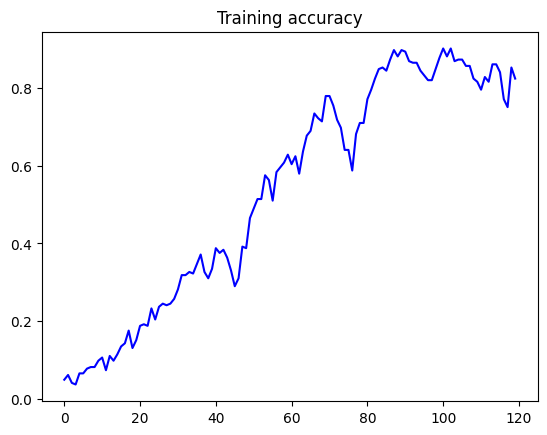

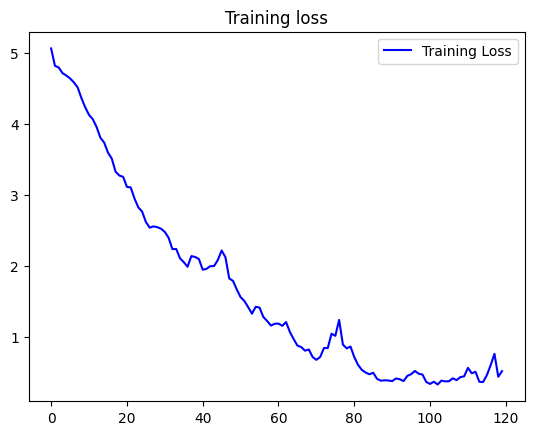

In [274]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## B. Generate texts


In [275]:

def sample_with_temperature(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype('float64')
    predictions = np.log(predictions + 1e-8) / temperature
    exp_predictions = np.exp(predictions)
    probabilities = exp_predictions / np.sum(exp_predictions)
    probas = np.random.multinomial(1, probabilities, 1)
    return np.argmax(probas)

def sample_top_k(predictions, k=10):
    top_k_indices = predictions.argsort()[-k:][::-1]
    top_k_probs = predictions[top_k_indices]
    top_k_probs = top_k_probs / np.sum(top_k_probs)
    chosen_index_in_top_k = np.random.choice(len(top_k_indices), p=top_k_probs)
    return top_k_indices[chosen_index_in_top_k]


def generate_text_with_sampling_and_penalty(model, tokenizer, seed_text, max_sequence_len, next_words,
                                           sampling_method='top_k', # Choose 'temperature', 'top_k', 'top_p', or 'argmax'
                                           temperature=1.0,
                                           top_k=70,
                                           repetition_penalty=1.2,
                                           penalty_window=5):

    generated_text = seed_text
    recent_words = []

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

        predictions = model.predict(token_list)[0]

        # Apply repetition penalty
        recent_word_indices = [tokenizer.word_index.get(word, 0) for word in recent_words if word in tokenizer.word_index]

        for word_index in recent_word_indices:
            # Ensure the index is within the bounds of the predictions array
            if word_index < len(predictions):
                predictions[word_index] /= repetition_penalty


        # Apply sampling based on the chosen method
        if sampling_method == 'temperature':
            predicted_index = sample_with_temperature(predictions, temperature)
        elif sampling_method == 'top_k':
            predicted_index = sample_top_k(predictions, k=top_k)
        else:
            print(f"Warning: Unknown sampling method '{sampling_method}'. Using argmax.")
            predicted_index = np.argmax(predictions)


        output_word = ""
        output_word = tokenizer.index_word.get(predicted_index)

        if output_word is None:
             # Handle cases where the index is not found in the tokenizer (shouldn't happen with valid indices)
             output_word = ""


        generated_text += " " + output_word

        # Update recent words, handling potential empty output_word
        if output_word:
            recent_words.append(output_word)
            if len(recent_words) > penalty_window:
                recent_words.pop(0)

    return generated_text



seed_text1 = "Snow White is "
generated_text1 = generate_text_with_sampling_and_penalty(
    model, tokenizer, seed_text1, max_sequence_len, 15,
    sampling_method='temperature',
    temperature=0.7,
    repetition_penalty=2.0,
    penalty_window=50
)
print("Generated Text (Temperature + Penalty):")
print(generated_text1)
print("-" * 30)


seed_text2 = "The stepmother was furious and "
generated_text2 = generate_text_with_sampling_and_penalty(
    model, tokenizer, seed_text2, max_sequence_len, 15,
    sampling_method='top_k',
    top_k=75,
    repetition_penalty=2.0,
    penalty_window=7
)
print("Generated Text (Top-K + Penalty):")
print(generated_text2)
print("-" * 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Generated Text (Temperature + Penalty):
Snow White is  the loveliest in the land not return snow white white to mirror ran little innocent
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32m

2. "Snow White lived in the forest with..."

In [276]:
seed_text3 = "Snow White lived in the forest with "
generated_text3 = generate_text_with_sampling_and_penalty(
    model, tokenizer, seed_text3, max_sequence_len, 15,
    sampling_method='temperature',
    temperature=0.7,
    repetition_penalty=2.0,
    penalty_window=50
)
print("Generated Text (Temperature + Penalty):")
print(generated_text3)
print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Generated Text (Temperature + Penalty):
Snow White lived in the forest with  land wild blue eyes and ran off little innocent tree tree tree little innocent innocent
------------------------------


3. "The queen looked into the mirror and said..."

In [277]:

seed_text4 = "The queen looked into the mirror and said "
generated_text4 = generate_text_with_sampling_and_penalty(
    model, tokenizer, seed_text4, max_sequence_len, 15,
    sampling_method='temperature',
    temperature=0.7,
    repetition_penalty=2.0,
    penalty_window=50
)
print("Generated Text (Temperature + Penalty):")
print(generated_text4)
print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Generated Text (Temperature + Penalty):
The queen looked into the mirror and said  came to the reward tree tree little innocent tree tree off ran off off little
------------------------------


4. "One day, Snow White found a small cottage and..."

In [278]:
seed_text5 = "One day, Snow White found a small cottage and "
generated_text5 = generate_text_with_sampling_and_penalty(
    model, tokenizer, seed_text5, max_sequence_len, 15,
    sampling_method='temperature',
    temperature=0.7,
    repetition_penalty=2.0,
    penalty_window=50
)
print("Generated Text (Temperature + Penalty):")
print(generated_text5)
print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Generated Text (Temperature + Penalty):
One day, Snow White found a small cottage and  who is the not return to was spot to away long ran off tree tree
------------------------------


In [279]:
seed_text6 = "Snow White is "
generated_text6 = generate_text_with_sampling_and_penalty(
    model, tokenizer, seed_text1, max_sequence_len, 50,
    sampling_method='temperature',
    temperature=0.7,
    repetition_penalty=2.0, #1.5
    penalty_window=50
)
print("Generated Text (Temperature + Penalty):")
print(generated_text6)
print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━